STEP1:
<------importing neccessary libraries-------->

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df=pd.read_csv("ds_salaries (1).csv")
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [83]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [84]:
df.shape

(3755, 11)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [86]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [87]:
df.duplicated().sum()

1171

In [88]:
## Indentifying garbage values

for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64
******************************
employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64
******************************
job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64
******************************
salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS   

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [90]:
df.describe(include="object")

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


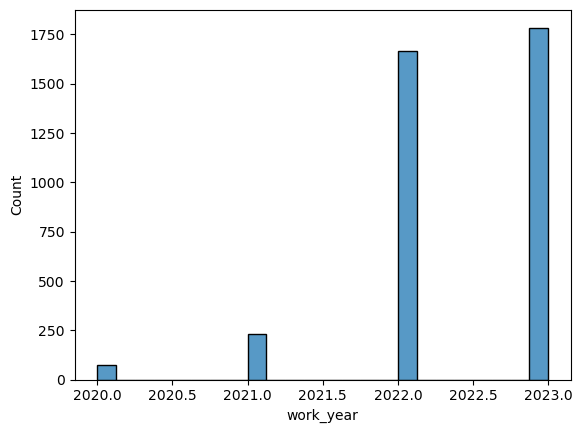

<Figure size 10x10 with 0 Axes>

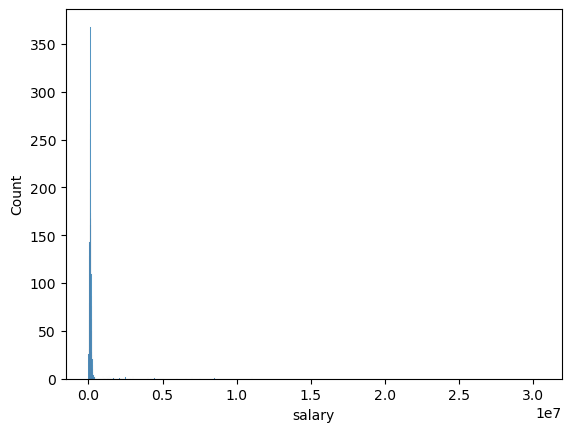

<Figure size 10x10 with 0 Axes>

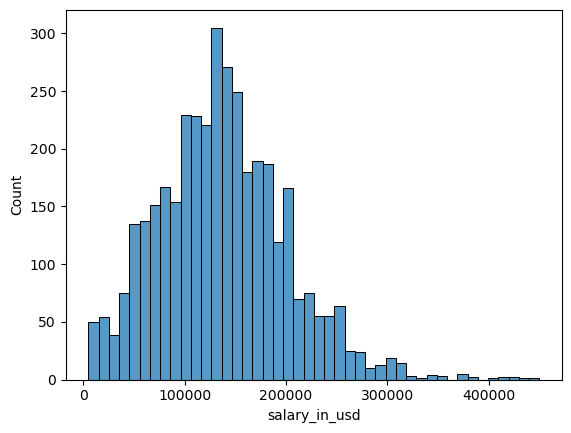

<Figure size 10x10 with 0 Axes>

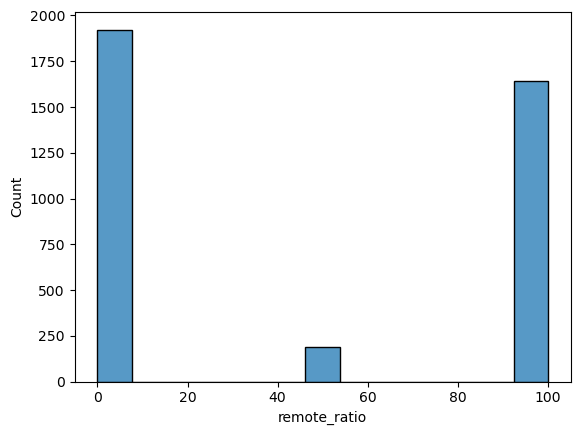

<Figure size 10x10 with 0 Axes>

In [91]:
## Histogram to understand the distribution

import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="int").columns:
    sns.histplot(data=df,x=i)
    plt.figure(figsize=(0.1,0.1))
    plt.show()

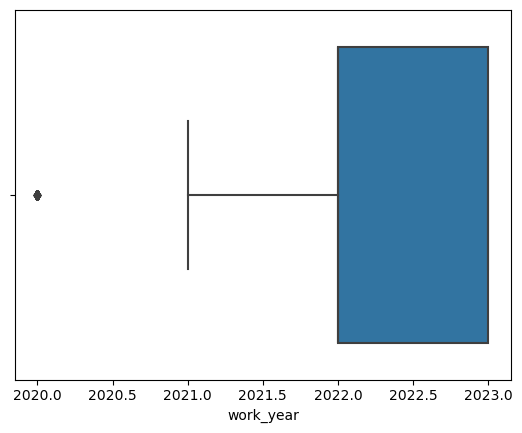

<Figure size 10x10 with 0 Axes>

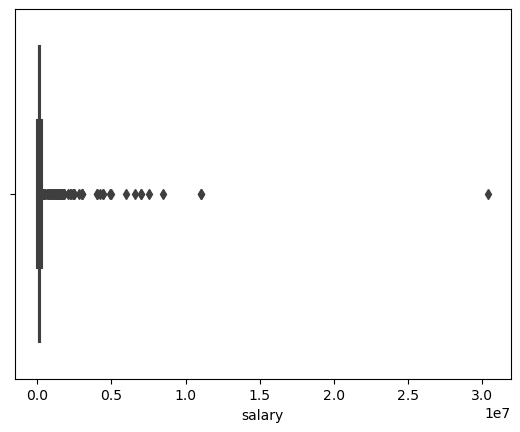

<Figure size 10x10 with 0 Axes>

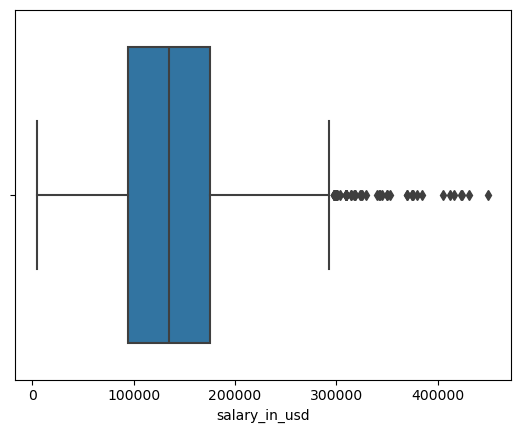

<Figure size 10x10 with 0 Axes>

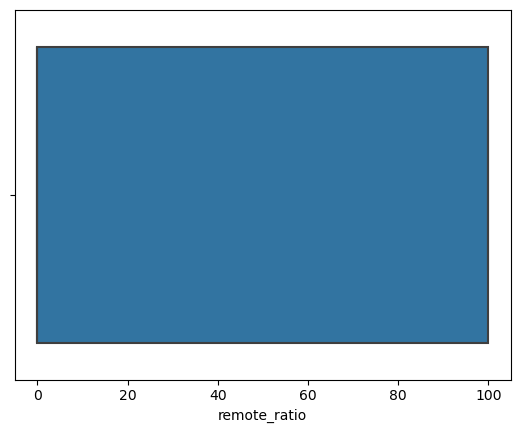

<Figure size 10x10 with 0 Axes>

In [92]:
## Boxplot to undersatnd the outliers

import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="int").columns:
    sns.boxplot(data=df,x=i)
    plt.figure(figsize=(0.1,0.1))
    plt.show()

In [93]:
## scatter plot to undersatnd the realtionship between target and independent variables.

df.select_dtypes(include="int").columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

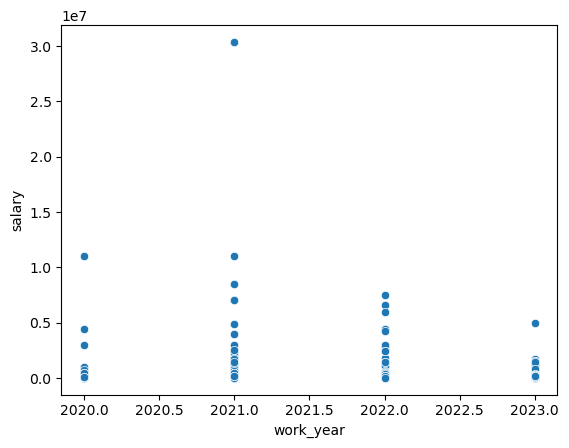

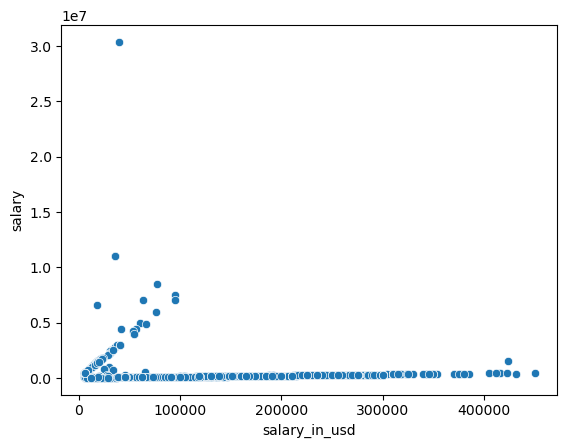

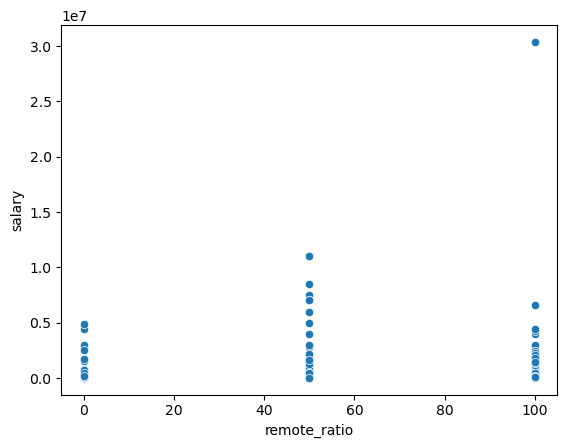

In [94]:
for i in ['work_year','salary_in_usd', 'remote_ratio']:
    sns.scatterplot(data=df,x=i,y='salary')
    plt.show()

<Axes: >

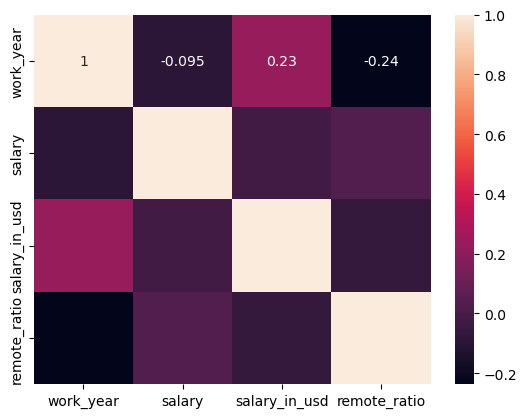

In [95]:
## Correlation between the variables
s=df.select_dtypes(include="number").corr()
sns.heatmap(s,annot=True)

In [96]:
#Here we use wisker function

def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [97]:
wisker(df['salary_in_usd'])

(-25000.0, 295000.0)

In [98]:
for i in ['salary_in_usd','remote_ratio']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

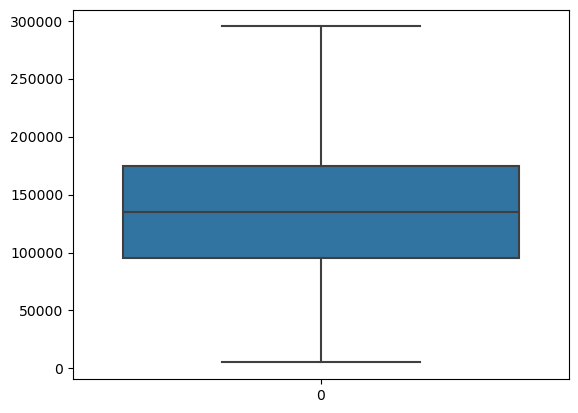

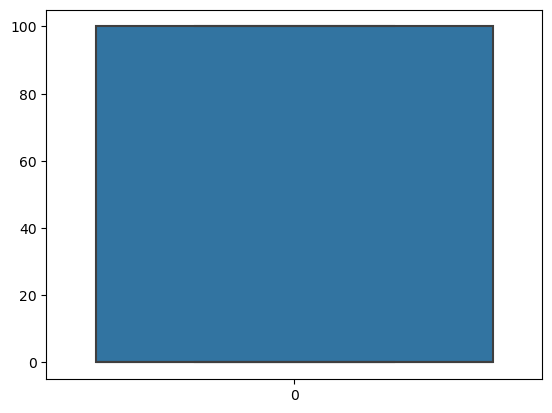

In [99]:
for i in ['salary_in_usd','remote_ratio']:
    sns.boxplot(df[i])
    plt.show()

In [100]:
# Hence we are done with outliers treatment of continous numerical value

In [101]:
for feat in df.select_dtypes(include=['object']):
    print(df.select_dtypes(include=['object'])[feat].value_counts())

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64
employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64
job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64
salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64
employee_resi

In [102]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [103]:
le.fit_transform(df['experience_level'])

array([3, 2, 2, ..., 0, 0, 3])

In [104]:
df['en_experience_level']=le.fit_transform(df['experience_level'])
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,en_experience_level
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847.0,ES,100.0,ES,L,3
1,2023,MI,CT,ML Engineer,30000,USD,30000.0,US,100.0,US,S,2


In [105]:
df['en_employment_type']=le.fit_transform(df['employment_type'])

In [106]:
df['en_job_title']=le.fit_transform(df['job_title'])

In [107]:
df['en_salary_currency']=le.fit_transform(df['salary_currency'])

In [108]:
df['en_employee_residence']=le.fit_transform(df['employee_residence'])

In [109]:
df['en_company_location']=le.fit_transform(df['company_location'])

In [110]:
df['en_comapny_size']=le.fit_transform(df['company_size'])

In [111]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,en_experience_level,en_employment_type,en_job_title,en_salary_currency,en_employee_residence,en_company_location,en_comapny_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847.0,ES,100.0,ES,L,3,2,84,7,26,25,0
1,2023,MI,CT,ML Engineer,30000,USD,30000.0,US,100.0,US,S,2,0,66,19,75,70,2


In [112]:
df.drop(columns=['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],inplace=True)

In [113]:
df

,work_year,salary,salary_in_usd,remote_ratio,en_experience_level,en_employment_type,en_job_title,en_salary_currency,en_employee_residence,en_company_location,en_comapny_size
0,2023,80000,85847.0,100.0,3,2,84,7,26,25,0
1,2023,30000,30000.0,100.0,2,0,66,19,75,70,2
2,2023,25500,25500.0,100.0,2,0,66,19,75,70,2
3,2023,175000,175000.0,100.0,3,2,47,19,11,12,1
4,2023,120000,120000.0,100.0,3,2,47,19,11,12,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,412000,295000.0,100.0,3,2,47,19,75,70,0
3751,2021,151000,151000.0,100.0,2,2,84,19,75,70,0
3752,2020,105000,105000.0,100.0,0,2,47,19,75,70,2
3753,2020,100000,100000.0,100.0,0,0,17,19,75,70,0


In [114]:
## Hence our dataset encoded properly

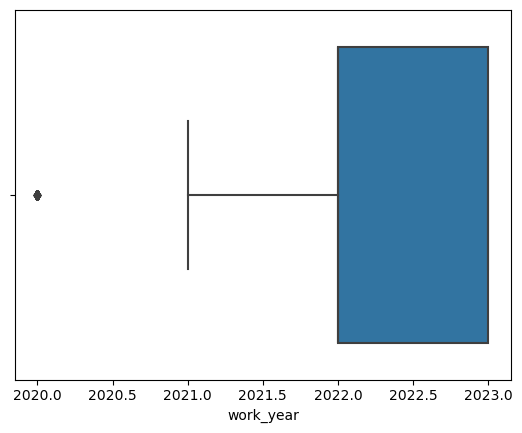

<Figure size 10x10 with 0 Axes>

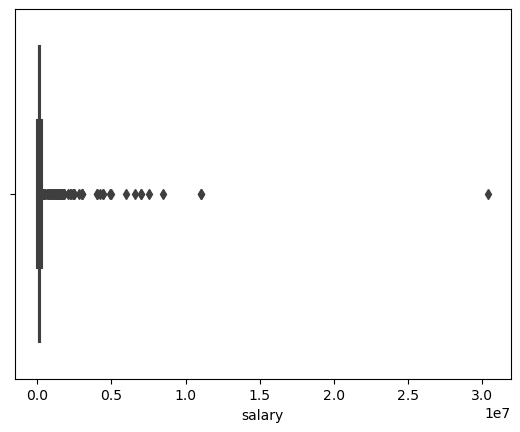

<Figure size 10x10 with 0 Axes>

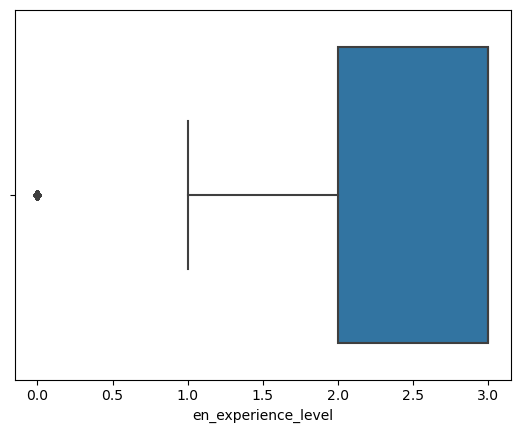

<Figure size 10x10 with 0 Axes>

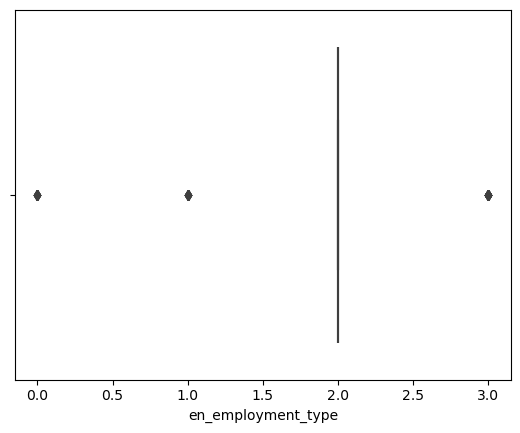

<Figure size 10x10 with 0 Axes>

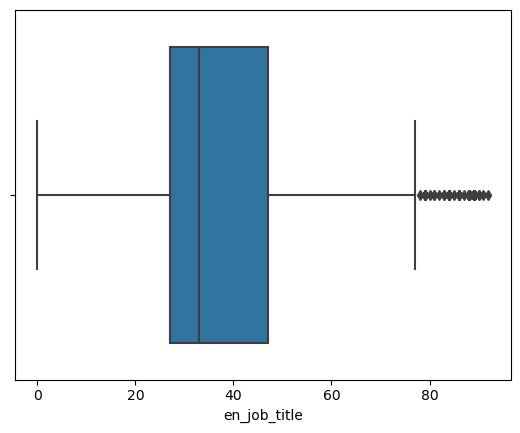

<Figure size 10x10 with 0 Axes>

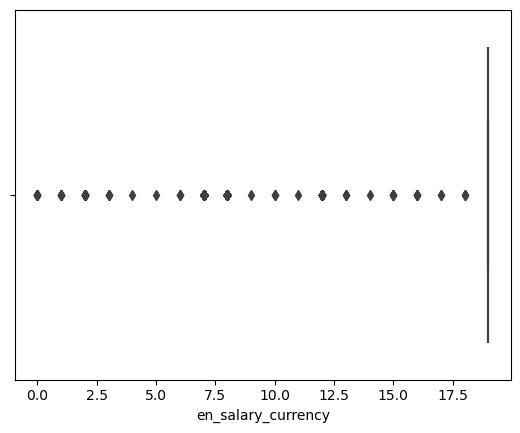

<Figure size 10x10 with 0 Axes>

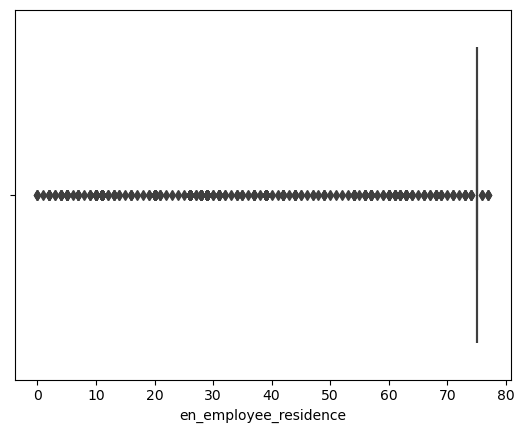

<Figure size 10x10 with 0 Axes>

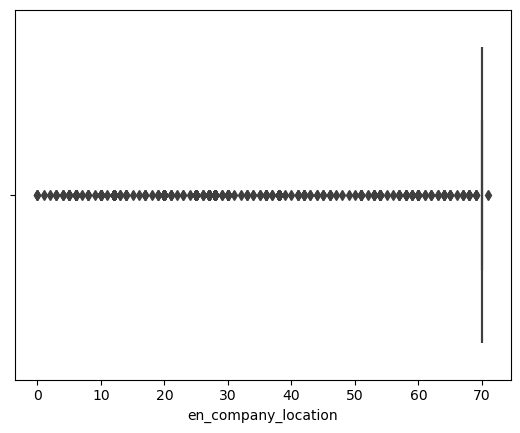

<Figure size 10x10 with 0 Axes>

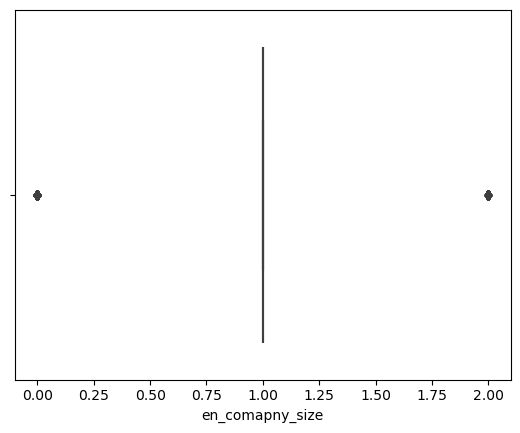

<Figure size 10x10 with 0 Axes>

In [115]:
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="int").columns:
    sns.boxplot(data=df,x=i)
    plt.figure(figsize=(0.1,0.1))
    plt.show()

In [116]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [117]:
for i in ['en_job_title','en_company_location','en_salary_currency']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

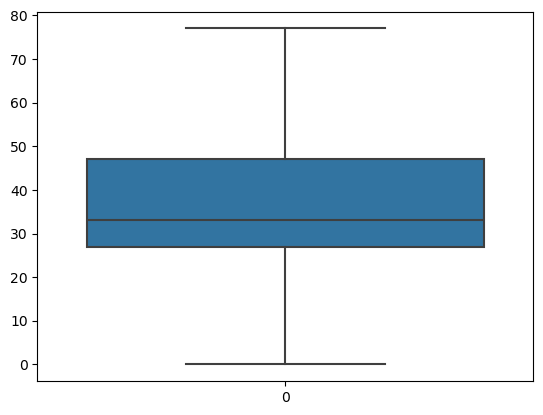

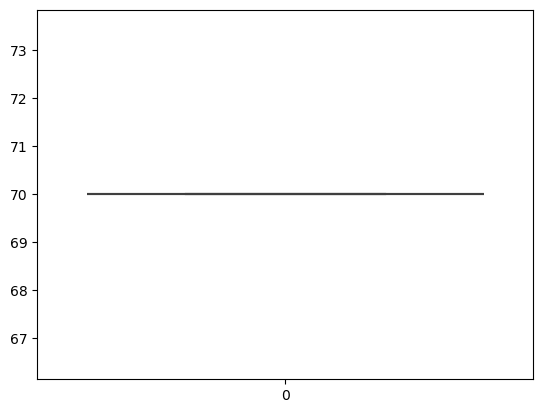

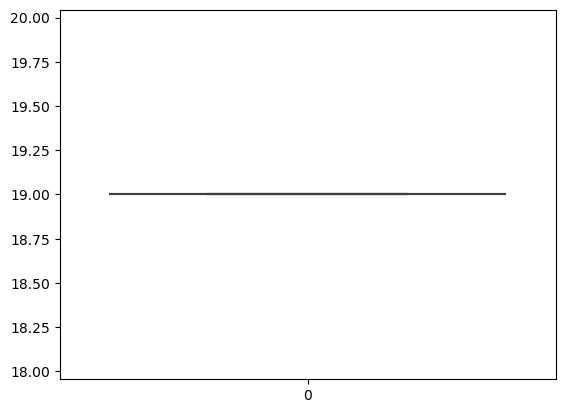

In [118]:
for i in ['en_job_title','en_company_location','en_salary_currency']:
    sns.boxplot(df[i])
    plt.show()

In [119]:
df.drop(columns='en_employee_residence')

,work_year,salary,salary_in_usd,remote_ratio,en_experience_level,en_employment_type,en_job_title,en_salary_currency,en_company_location,en_comapny_size
0,2023,80000,85847.0,100.0,3,2,77.0,19.0,70.0,0
1,2023,30000,30000.0,100.0,2,0,66.0,19.0,70.0,2
2,2023,25500,25500.0,100.0,2,0,66.0,19.0,70.0,2
3,2023,175000,175000.0,100.0,3,2,47.0,19.0,70.0,1
4,2023,120000,120000.0,100.0,3,2,47.0,19.0,70.0,1
...,...,...,...,...,...,...,...,...,...,...
3750,2020,412000,295000.0,100.0,3,2,47.0,19.0,70.0,0
3751,2021,151000,151000.0,100.0,2,2,77.0,19.0,70.0,0
3752,2020,105000,105000.0,100.0,0,2,47.0,19.0,70.0,2
3753,2020,100000,100000.0,100.0,0,0,17.0,19.0,70.0,0


In [120]:
from sklearn.preprocessing import StandardScaler

In [121]:
ss=StandardScaler()

In [142]:
ss.fit(df[['salary']])

StandardScaler()

In [143]:
df['salary_ss']=pd.DataFrame(ss.transform(df[['salary']]),columns=['x'])
df.head()

,work_year,salary,salary_in_usd,remote_ratio,en_experience_level,en_employment_type,en_job_title,en_salary_currency,en_employee_residence,en_company_location,en_comapny_size,salary_in_usd_ss,salary_ss
0,2023,80000,85847.0,100.0,3,2,77.0,19.0,26,70.0,0,-0.836680,-0.164827
1,2023,30000,30000.0,100.0,2,0,66.0,19.0,75,70.0,2,-1.750856,-0.239277
2,2023,25500,25500.0,100.0,2,0,66.0,19.0,75,70.0,2,-1.824518,-0.245978
3,2023,175000,175000.0,100.0,3,2,47.0,19.0,11,70.0,1,0.622692,-0.023371
4,2023,120000,120000.0,100.0,3,2,47.0,19.0,11,70.0,1,-0.277620,-0.105266


In [144]:
df.drop(columns=['salary_in_usd','salary']).head()

,work_year,remote_ratio,en_experience_level,en_employment_type,en_job_title,en_salary_currency,en_employee_residence,en_company_location,en_comapny_size,salary_in_usd_ss,salary_ss
0,2023,100.0,3,2,77.0,19.0,26,70.0,0,-0.836680,-0.164827
1,2023,100.0,2,0,66.0,19.0,75,70.0,2,-1.750856,-0.239277
2,2023,100.0,2,0,66.0,19.0,75,70.0,2,-1.824518,-0.245978
3,2023,100.0,3,2,47.0,19.0,11,70.0,1,0.622692,-0.023371
4,2023,100.0,3,2,47.0,19.0,11,70.0,1,-0.277620,-0.105266


In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x=df.drop(columns=['salary_ss','remote_ratio','en_employee_residence','en_company_location','salary_in_usd_ss'])
y=df['salary_ss']
y

0       -0.164827
1       -0.239277
2       -0.245978
3       -0.023371
4       -0.105266
          ...    
3750     0.329525
3751    -0.059107
3752    -0.127602
3753    -0.135047
3754    10.139124
Name: salary_ss, Length: 3755, dtype: float64

In [158]:
x

,work_year,salary,salary_in_usd,en_experience_level,en_employment_type,en_job_title,en_salary_currency,en_comapny_size
0,2023,80000,85847.0,3,2,77.0,19.0,0
1,2023,30000,30000.0,2,0,66.0,19.0,2
2,2023,25500,25500.0,2,0,66.0,19.0,2
3,2023,175000,175000.0,3,2,47.0,19.0,1
4,2023,120000,120000.0,3,2,47.0,19.0,1
...,...,...,...,...,...,...,...,...
3750,2020,412000,295000.0,3,2,47.0,19.0,0
3751,2021,151000,151000.0,2,2,77.0,19.0,0
3752,2020,105000,105000.0,0,2,47.0,19.0,2
3753,2020,100000,100000.0,0,0,17.0,19.0,0


In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [148]:
x_train.shape

(3004, 8)

In [149]:
x_test.shape

(751, 8)

In [150]:
y_train.shape

(3004,)

In [151]:
y_test.shape

(751,)

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [154]:
model.score(x_test,y_test)

0.9814009426216009

In [155]:
## Predict y

y_predict=model.predict(x_test)
y_predict

array([-7.14065544e-03, -7.54862251e-02, -1.79716941e-01, -6.03142532e-02,
       -7.32154845e-02,  1.38543888e-02,  2.87444912e-02, -7.54862251e-02,
       -6.80411740e-02, -5.76106573e-02, -1.59258158e-02, -2.70054180e-01,
       -5.52356860e-02, -6.05961228e-02, -1.05266430e-01, -5.75883221e-02,
       -2.24387248e-01, -6.05961228e-02,  1.26785392e-01,  1.59414073e-01,
       -1.64826839e-01, -1.05266430e-01, -9.33543479e-02,  7.20370468e-02,
       -1.24580382e-01, -5.37466757e-02, -1.35046634e-01, -1.35046634e-01,
       -3.78797827e-02, -2.38800867e-01, -1.20156532e-01,  8.83049005e-02,
       -7.84612676e-02, -9.03763275e-02,  8.45913090e-02, -6.05961228e-02,
       -1.53527642e-03,  6.88256686e-02,  6.75942572e-02, -7.22104026e-02,
       -4.57060205e-02, -8.48076465e-03, -2.06651886e-01, -2.09497146e-01,
       -2.44373645e-03, -8.48076465e-03, -1.05266430e-01,  4.69495770e-02,
       -1.43724884e-01,  4.96281575e-02, -1.79716941e-01, -1.49978429e-01,
        1.86692592e-01,  

In [156]:
## Get r2
from sklearn.metrics import mean_squared_error,r2_score

In [157]:
r2_score(y_test,y_predict)

0.9814009426216009